Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2040 images belonging to 3 classes.
Found 360 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Epoch 1/30
63/63 [==============================] - 6s 83ms/step - loss: 2.0360 - accuracy: 0.3564 - val_loss: 1.0438 - val_accuracy: 0.4034
Epoch 2/30
63/63 [==============================] - 5s 82ms/step - loss: 1.0423 - accuracy: 0.4445 - val_loss: 0.8497 - val_accuracy: 0.5483
Epoch 3/30
63/63 [==============================] - 5s 80ms/step - loss: 0.8194 - accuracy: 0.6143 - val_loss: 1.0989 - val_accuracy: 0.4403
Epoch 4/30
63/63 [==============================] - 5s 81ms/step - loss: 0.6113 - accuracy: 0.7367 - val_loss: 1.1330 - val_accuracy: 0.5199
Epoch 5/30
63/63 [==============================] - 5s 81ms/step - loss: 0.3944 - accuracy: 0.8487 - val_loss: 1.3201 - val_accuracy: 0.5085
Epoch 6/30
63/63 [========================

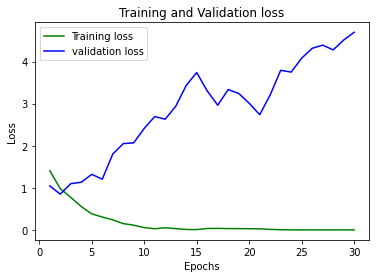

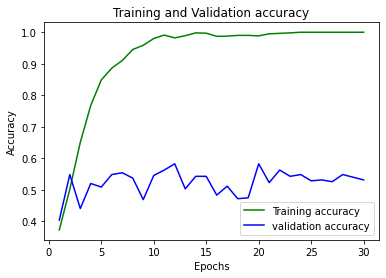

In [ ]:
# batch size, epochs, loss, metrics, optimizer, model, steps_per_epoch, early stopping, dropout, regularization

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
from google.colab import drive

# for comparability of the different models
# import numpy as np
# np.random.seed(5)

drive.mount('/content/drive')

#train_dir = Path.cwd() / '/content/drive/MyDrive/AAA Private Ablage/Dateien/Studium/Leuphana/Python/genres/train' #Tobi
#test_dir = Path.cwd() / '/content/drive/MyDrive/AAA Private Ablage/Dateien/Studium/Leuphana/Python/genres/test' #Tobi

#train_dir =Path.cwd() / '/content/drive/MyDrive/UNI/Machine Learning/genres/train' #jana
#test_dir =Path.cwd() / '/content/drive/MyDrive/UNI/Machine Learning/genres/test' #jana

#train_dir = Path.cwd() / '/content/drive/MyDrive/Dies und Das/genres/train' #Sandra
#test_dir = Path.cwd() / '/content/drive/MyDrive/Dies und Das/genres/test' #Sandra

train_dir = Path.cwd() / '/content/drive/MyDrive/Dies und Das/genres_split_spect/train'
test_dir = Path.cwd() / '/content/drive/MyDrive/Dies und Das/genres_split_spect/test'

IMG_HEIGHT = 217
IMG_WIDTH = 334
epochs = 30
batch_size = 32

#increased validation split to ensure enough samples for validation (bigger than batch size)
training_generator = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_data_gen = training_generator.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    classes = ['blues', 'jazz', 'rock'],
    seed=5,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_data_gen = training_generator.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    classes = ['blues', 'jazz', 'rock'],
    seed=5,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

test_data_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    classes = ['blues', 'jazz', 'rock'],
    seed=5,
    batch_size=batch_size,
    class_mode='categorical')


# design the model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation=tf.nn.relu, input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
                                    tf.keras.layers.MaxPooling2D((2, 2)),
                                    tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu, input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
                                    tf.keras.layers.MaxPooling2D((2, 2)),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
                                    tf.keras.layers.MaxPooling2D((2, 2)),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(2048, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(3, activation=tf.nn.softmax)]) # adjust to number of genres

# build the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_data_gen,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=validation_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    validation_steps=validation_data_gen.samples // batch_size,
    
)

model.evaluate(test_data_gen)
model.summary()
model.save("saved_model")

# plot training and validation loss
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs_loss = range(1, (epochs+1))
plt.plot(epochs_loss, loss_train, 'g', label='Training loss')
plt.plot(epochs_loss, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs_accuracy = range(1, (epochs+1))
plt.plot(epochs_accuracy, loss_train, 'g', label='Training accuracy')
plt.plot(epochs_accuracy, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 600 images belonging to 3 classes.
7/7 [==============================] - 0s 28ms/step
[[30 12 18]
 [13 50  8]
 [ 7  3 59]]


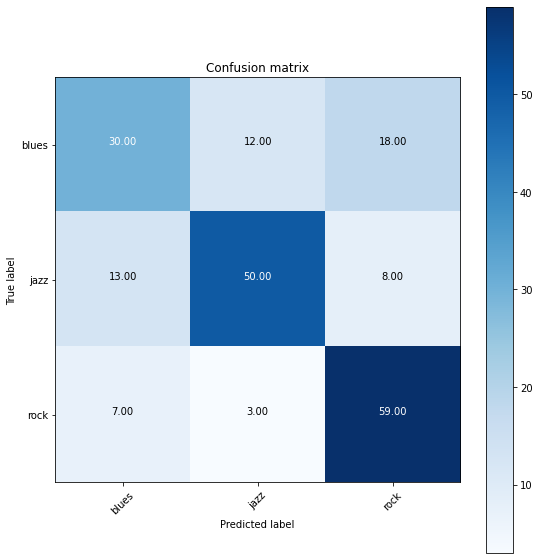

In [ ]:
# Confusion Matrix
# function for plotting from https://colab.research.google.com/drive/1ISfhxFDntfOos7cOeT7swduSqzLEqyFn#scrollTo=z0DRPKl39290
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from collections import OrderedDict
import itertools

# neuer test data generator mit angepasster batch size für Confusion Matrix
# sicher nicht die eleganteste Lösung, tut aber
test_data_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    classes = ['blues', 'jazz', 'rock'],
    seed=5,
    batch_size=200,
    class_mode='categorical')
X_train, y_train = next(train_data_gen)
X_test, y_test = next(test_data_gen)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    """if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')"""

    print(cm)
    cm = np.asarray(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

predictions = model.predict(X_test, verbose=1)
conf_matrix = confusion_matrix(np.argmax(y_test, 1), np.argmax(predictions, 1))



#genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
genres = {'blues': 0, 'jazz': 1, 'rock': 2}
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()




plt.figure(figsize=(8,8))
plot_confusion_matrix(conf_matrix, keys, normalize=True)
plt.show()

Feature Maps

In [ ]:
# using code from: https://medium.com/nerd-for-tech/visualizing-feature-maps-and-filters-eb05fb91d675

from tensorflow.keras.models import Model
import os
import cv2

inp= model.inputs 
print(inp)
out1= model.layers[0]. output  
print(out1)
feature_map_1= Model(inputs= inp, outputs= out1)  
feature_map_1.summary()

#finding out shape of filters for each layer
i=1
for layer in model.layers:
    if 'conv' in layer.name: 
        filters, bias= layer.get_weights()
        print('Filters Shape: '+ str(filters.shape, )+" " + 'Bias Shape: '+str(bias.shape)+ "<---- layer: "+str(i))
        print("-----------")
        i=i+1

[<KerasTensor: shape=(None, 217, 334, 1) dtype=float32 (created by layer 'conv2d_input')>]
KerasTensor(type_spec=TensorSpec(shape=(None, 215, 332, 16), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 217, 334, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 215, 332, 16)      160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________
Filters Shape: (3, 3, 1, 16) Bias Shape: (16,)<---- layer: 1
-----------
Filters Shape: (3, 3, 16, 32) Bias Shape: (32,)<---- layer: 2
-----------
Filters Shape: (3, 3, 32, 64) Bias Shape: (64,)<---- layer: 3
-----------


(217, 334, 3)


<function matplotlib.pyplot.show>

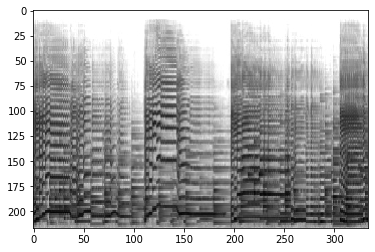

In [ ]:
#reading sample image, could also do this with folder_dir probably

os.chdir(r'/content/drive/MyDrive/UNI/Machine Learning/genres/train/jazz') #jana
#os.chdir(r'/content/drive/MyDrive/AAA Private Ablage/Dateien/Studium/Leuphana/Python/genres/train/jazz') #Tobi
img=plt.imread("jazz.00002.wav_mel.jpg")
#plt.imshow(img)
print(img.shape)

from skimage.color import rgb2gray
gray= rgb2gray(img)
gray.shape
plt.gray()
plt.imshow(gray)
plt.show


(1, 217, 334)
(1, 215, 332, 16)


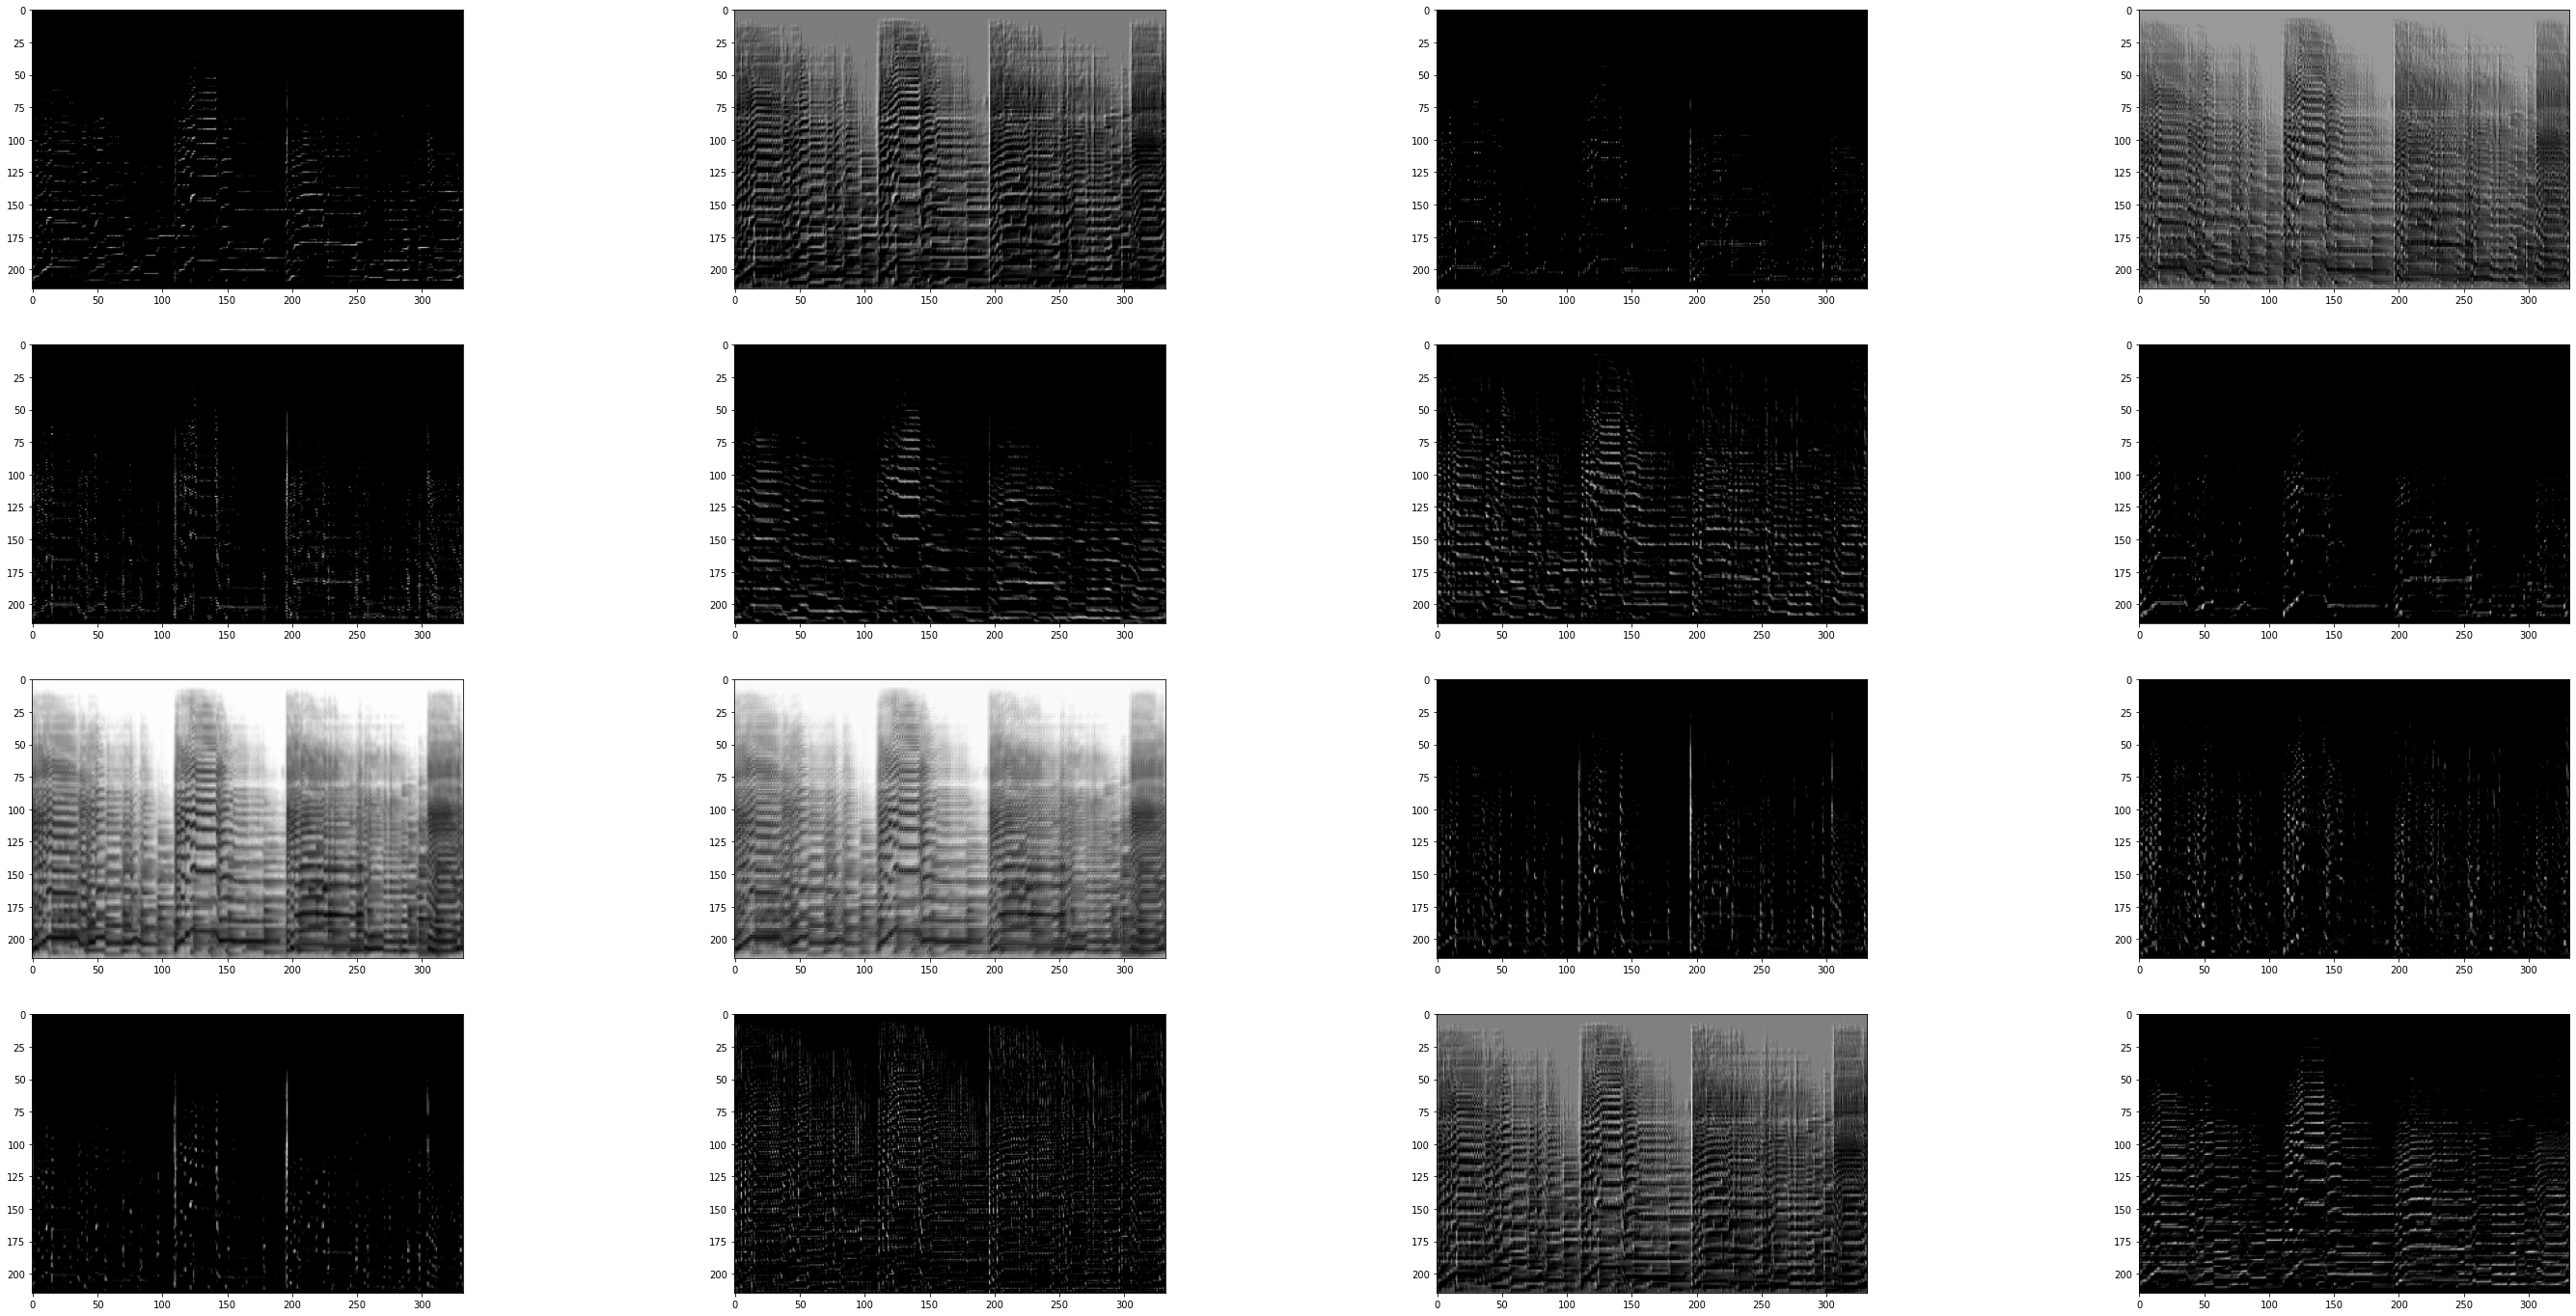

In [ ]:
#Feature Map Layer 1
img=plt.imread("jazz.00002.wav_mel.jpg")

input_img= np.expand_dims(gray, axis=0) 
print(input_img.shape)                      # Printing out size of Input Image

f1=feature_map_1.predict(input_img)        # predicting out the Image 
print(f1.shape)                            
fig= plt.figure(figsize=(50,50))
for i in range(16):
    ax=fig.add_subplot(8,4,i+1)
    ax.imshow(f1[0,:,:,i])

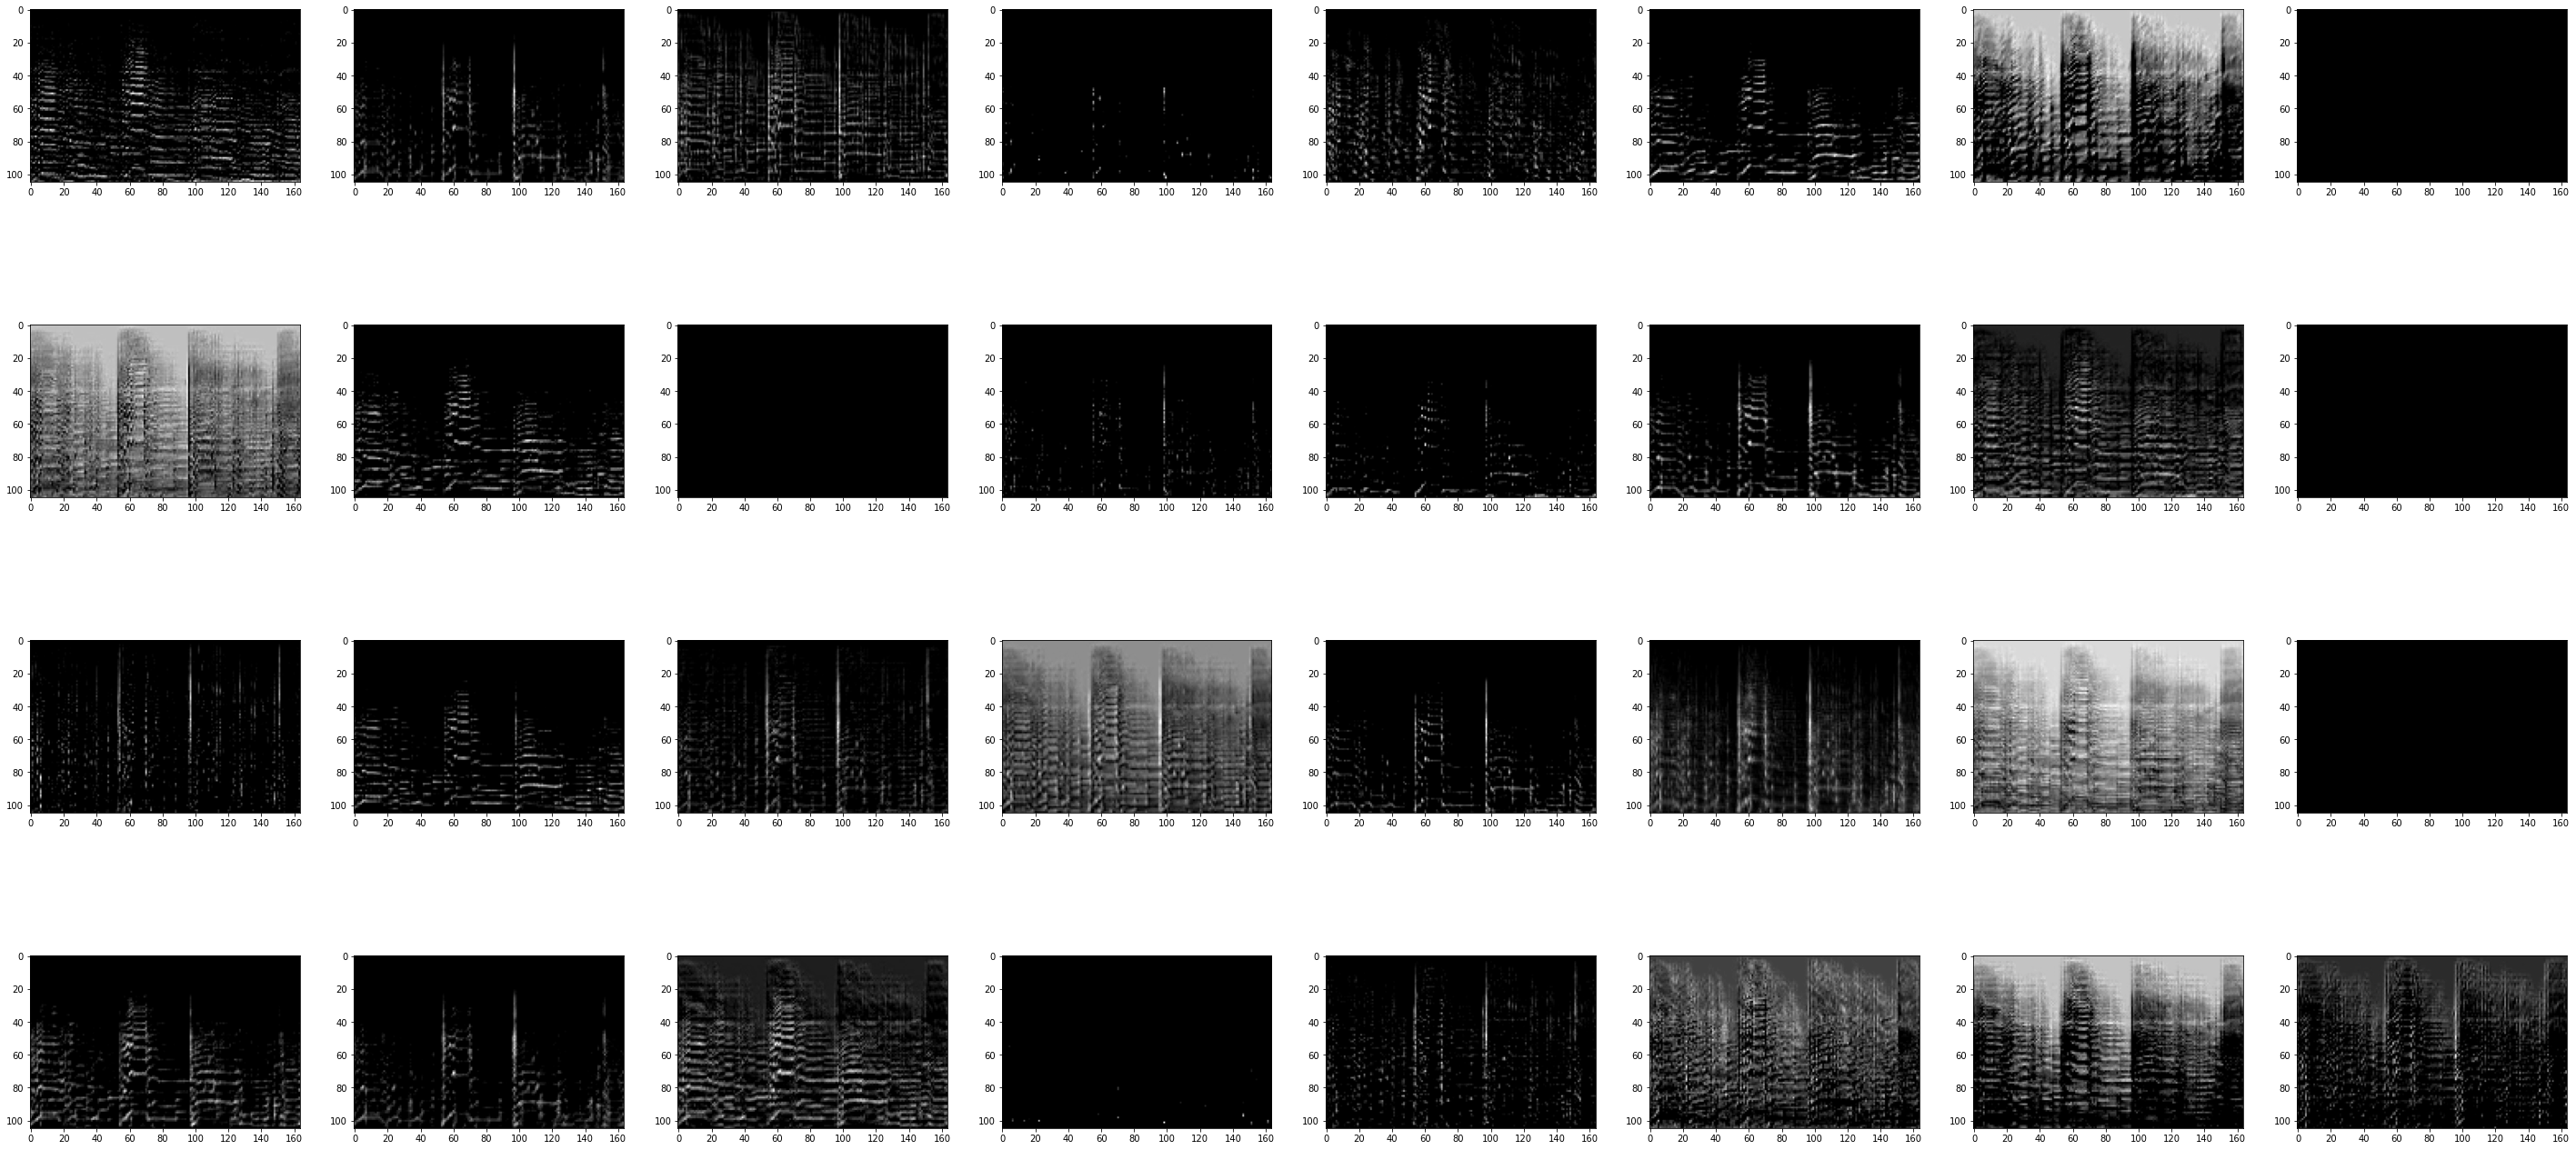

In [ ]:
#Feature Map Layer 2 (we could do this for all leayers in the CNN if we wanted to)

inp= model.inputs 

out2= model.layers[2]. output  # shape of the layer 2
feature_map_2= Model(inputs= inp, outputs= out2)  # submodel and pass input and output shapes


img=plt.imread("jazz.00002.wav_mel.jpg")   #sample image
input_img= np.expand_dims(gray, axis=0)      
                      


f2=feature_map_2.predict(input_img)        # predicting out the Image 


fig= plt.figure(figsize=(50,50))
for i in range(32):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(f2[0,:,:,i])

(3, 3, 3, 16) (16,)


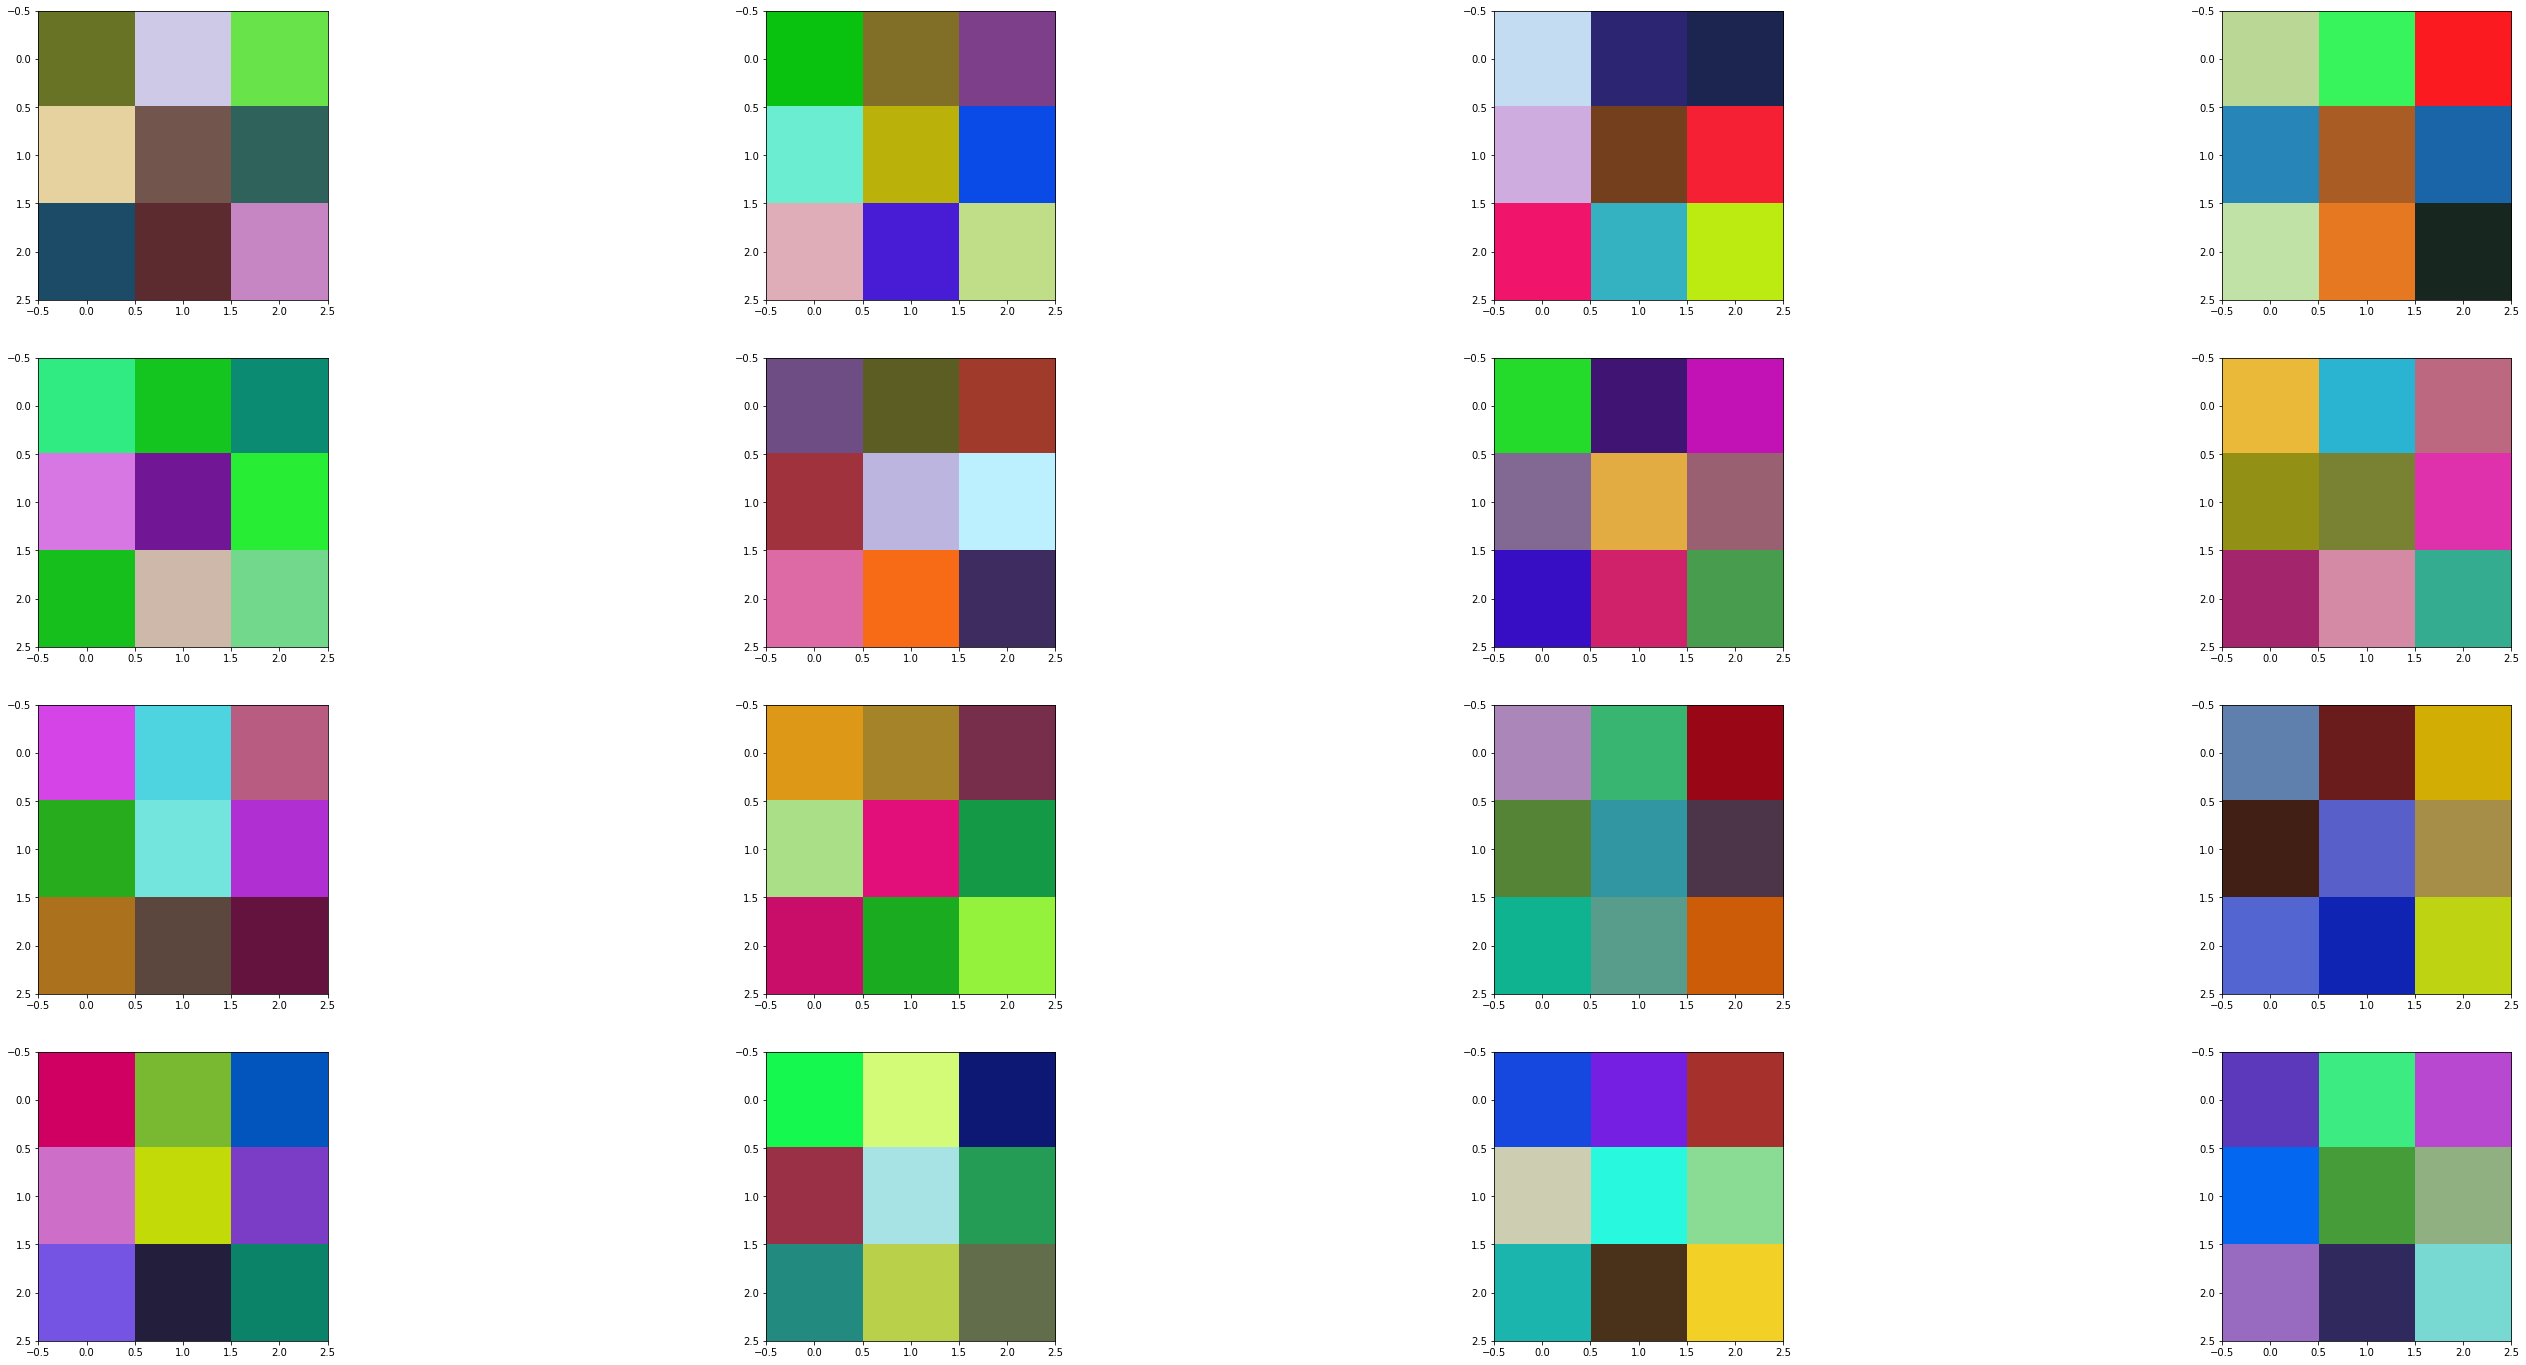

In [ ]:
#filter weights of layer 1

layer= model.layers
layer_1= layer[0]
filter_1, bias_1= layer_1.get_weights()
print(filter_1.shape, bias_1.shape)

#Normalize the weights
f_min, f_max = filter_1.min(), filter_1.max()
filter_1 = (filter_1 - f_min) / (f_max - f_min)

fig= plt.figure(figsize=(50,50))
for i in range(16):
    ax = fig.add_subplot(8,4,i+1)
    ax.imshow(filter_1[:,:,:,i], cmap='gray')